<h1><center>Laboratorio 6: El Pandas no Muerde (act IV) 🐼</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Pablo Badilla, Ignacio Meza
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias, Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Isabel Marx
- Nombre de alumno 2: Canela Orellana


### **Link de repositorio de GitHub:** https://github.com/CanelaOrellana/MDS7202-IsabelMarx-y-CanelaOrellana


## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**. 
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias. 
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Aplicar los paradigmas y buenas prácticas de programación vistas hasta este momento.
- Comprender y aprovechar las ventajas que nos ofrece la liberia `numpy` con respecto a trabajar en Python 'puro'.
- Visualizar aplicaciones de filtros de imágenes sin el uso de librerías.
- Verificar que el uso indiscriminado de `for` puede afectar en la eficiencia en al procesar datos masivos.


El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `numpy`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre arreglos (*o tensores*).

## Descripción del laboratorio.

### Importamos librerias utiles 😸

In [114]:
# Libreria Core del lab.
import numpy as np
!pip install --upgrade pandas
!pip install xlrd
!pip install openpyxl
import pandas as pd
import datetime
from scipy import stats

from IPython.display import display, Markdown, Latex

#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [115]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = '/content/drive/MyDrive/online_retail_II.pickle'
except: 
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Segmentación de Clientes en Tienda de Retail 🛍️

<p align="center">
  <img width=300 src="https://s1.eestatic.com/2018/04/14/social/la_jungla_-_social_299733421_73842361_854x640.jpg">
</p>

## 1.1 Cargar Dataset

Mr. Lepin Mora quien es el gerente de una cotizada tienda de retail en Europa, les solicita si pueden analizar los datos de algunas de sus tiendas.

Para esto, el área de ventas les entrega el archivo `online_retail_II.pickle` con el que se les pide que cargue y visualicen algunas de las filas que componen el Dataset.

Realice una primera visualización de los datos y señale los atributos que componen el dataset. Señale las columnas que conforman el dataset, el tipo de variable presente en cada columna y comente que representa cada una de estas.

**Respuesta:**

In [116]:
df_retail = pd.read_pickle("/content/drive/MyDrive/online_retail_II.pickle")
df_retail = df_retail.astype(
    {
        "Invoice": "category",
        "StockCode": "category",
        "Description": str,
        "Customer ID": "category",
    }
)
df_retail.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [117]:
df_retail[df_retail["StockCode"] == 48111]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
523,489522,48111,DOOR MAT 3 SMILEY CATS,1,2009-12-01 11:45:00,6.75,15998.0,United Kingdom
870,489537,48111,DOOR MAT 3 SMILEY CATS,2,2009-12-01 12:14:00,6.75,14040.0,United Kingdom
1654,489575,48111,DOOR MAT 3 SMILEY CATS,2,2009-12-01 13:37:00,6.75,13590.0,United Kingdom
2919,489637,48111,DOOR MAT 3 SMILEY CATS,4,2009-12-01 15:36:00,6.75,17243.0,United Kingdom
3866,489787,48111,DOOR MAT 3 SMILEY CATS,1,2009-12-02 11:53:00,6.75,15542.0,United Kingdom
...,...,...,...,...,...,...,...,...
519598,537666,48111,DOORMAT 3 SMILEY CATS,1,2010-12-07 18:36:00,14.43,NaN,United Kingdom
522599,537881,48111,DOORMAT 3 SMILEY CATS,10,2010-12-09 09:23:00,6.75,15513.0,United Kingdom
524864,538148,48111,DOORMAT 3 SMILEY CATS,2,2010-12-09 16:26:00,14.43,NaN,United Kingdom
524976,538149,48111,DOORMAT 3 SMILEY CATS,1,2010-12-09 16:27:00,14.43,NaN,United Kingdom


> El dataset cuenta con 8 columnas:
1.   Invoice: número de boleta de compra
2.   StockCode: código del producto
3.   Description: descripción del producto
4.   Quantity: cantidad de unidades del producto en la compra
5.   InvoiceDate: fecha de la compra
6.   Price: precio del prodcuto
7.   Customer ID: identificación del comprador
8.   Country: país de origen del usuario




## 1.2 Análisis Explotatorio de los Datos [0.5 puntos] 

En base a la primera visualización del dataset, *Don Mora* le solicita que realicen un análisis exploratorio de los datos, para esto les deberán realizar un análisis univariado y multivariado. De la revisión, ustedes deben explicar potenciales anomalías visualizadas y señalar si existe la necesidad de realizar una limpieza de datos.

Explique a que nos referimos con análisis univariable, multivariable y de datos faltantes. ¿Qué beneficios nos otorga estudiar estos datos?. Sea conciso con su respuesta y no escriba mas de 5 líneas para su respuesta.

**Respuesta a la Pregunta:**

> El análisis univariable se basa en generar métodos estadísticos y gráficas que entreguen métricas de cada columna por separado, mientras que el análisis multivariable se enfoca el análisis en pares de columnas, evaluando posibles relaciones entre ellas. En el análisis de datos faltantes se observa la cantidad de datos nulos, para evaluar como abordarlos o si directamente descartarlos. Estos procedimientos permiten saber de antemano la distribución de las variables, la correlación entre ellas y el grado de sesgo(ojalá nulo), respectivamente, que otorga el dataset, para no caer en conclusiones equivocadas.

### 1.2.1 Análisis Univariado [2 Puntos]

A continuación, se le presentan dos funciones para analizar los datos que componen un dataframe. La primera de estas es la función ``profile_serie()`` la cual recibe una serie y le entrega un análisis detallado de los datos que conforman dicha serie. 

Ejecute la funcion ``profile_serie()`` sobre cada serie para realizar un análisis univariado de estas. A continuación, comente acerca de el comportamiento de cada variable según las estadísticas descriptivas y los gráficos generados.

In [118]:
from pandas.api.types import is_numeric_dtype
from pandas.core.dtypes.common import is_datetime_or_timedelta_dtype


def profile_serie(serie_in, n_samples=1000, random_state=42):
    serie = serie_in.copy()

    profile = pd.Series(dtype='object')
    profile["Type"] = serie.dtype
    profile = pd.concat([profile, serie.describe()])

    # profile = pd.Series([])

    if is_numeric_dtype(serie):
        profile["Negative"] = (serie < 0).sum()
        profile["Negative (%)"] = (
            str(round((serie < 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Zeros"] = (serie == 0).sum()
        profile["Zeros (%)"] = (
            str(round((serie == 0).sum() / len(serie) * 100, 2)) + " %"
        )
        profile["Kurt"] = serie.kurt()
        profile["Skew"] = serie.skew()

    profile[" "] = " "  # espacio

    profile["Missing cells"] = serie.isnull().sum()
    profile["Missing cells (%)"] = (
        str(round(serie.isnull().sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Duplicate rows"] = serie.duplicated(False).sum()
    profile["Duplicate rows (%)"] = (
        str(round(serie.duplicated(False).sum() / len(serie) * 100, 2)) + " %"
    )
    profile["Total size in memory"] = str(serie.memory_usage(index=True)) + " bytes"

    # profile = pd.concat([profile, description])

    profile = profile.rename(
        index={
            "count": "Number of observations",
            "mean": "Mean",
            "std": "Std",
            "min": "Min",
            "max": "Max",
            "unique": "Unique",
            "top": "Top",
            "freq": "Freq",
        }
    )
    no_outliers_fig = None

    if is_numeric_dtype(serie):

        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(
            sampled_serie, marginal="box", title=f"{serie.name} - With Outliers"
        )

        no_outliers = sampled_serie.loc[(np.abs(stats.zscore(sampled_serie)) < 3)]
        # zscore = https://es.wikipedia.org/wiki/Unidad_tipificada
        
        no_outliers_fig = px.histogram(
            no_outliers, marginal="box", title=f"{serie.name} - Without Outliers"
        )

    elif is_datetime_or_timedelta_dtype(serie):
        sampled_serie = serie.sample(n_samples, random_state=random_state)
        fig = px.histogram(sampled_serie, marginal="box", title=f"{serie.name}")
    
    else:
        count = (
            serie.value_counts()[0:100]
            .reset_index()
            .rename(columns = {'count': 'Count'})
        )
        fig = px.bar(
            x=count[serie.name].astype(str),
            y=count["Count"],
            title=f"100 Most common categories of {serie.name}",
        )
    display(Markdown(f'## {serie.name} Profile'))
    display(profile)
    fig.show()

    if no_outliers_fig:
        no_outliers_fig.show()

    # return fig, profile

In [119]:
profile_serie(df_retail['Price']) 

## Price Profile

Type                            float64
Number of observations         525461.0
Mean                           4.688834
Std                          146.126914
Min                           -53594.36
25%                                1.25
50%                                 2.1
75%                                4.21
Max                            25111.09
Negative                              3
Negative (%)                      0.0 %
Zeros                              3687
Zeros (%)                         0.7 %
Kurt                       64868.344873
Skew                        -140.768446
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   524485
Duplicate rows (%)              99.81 %
Total size in memory      4203816 bytes
dtype: object

Con respecto a la variable 'Price', se observa que existen 525461 muestras y que no existen nulos. Sin embargo, se observa que existen 3 datos que contienen precios negativos, lo que no tiene sentido. Además, se detectaron 3687 datos con precio igual a 0, lo que en una tienda de retail también genera dudas con respecto a la veracidad de estas muestras.

Por otro lado, se detectan 524485 muestras con Precios duplicados en el dataset, luego el 0.19% de los datos tienen precio único y fueron comprados una sola vez, lo que es de esperar en una tienda retail.

In [120]:
profile_serie(df_retail['Country'])

## Country Profile

Type                              object
Number of observations            525461
Unique                                40
Top                       United Kingdom
Freq                              485852
                                        
Missing cells                          0
Missing cells (%)                  0.0 %
Duplicate rows                    525461
Duplicate rows (%)               100.0 %
Total size in memory       4203816 bytes
dtype: object

En cuanto a la variable 'Country,' se nota que no hay muestras nulas. Además, la mayoría de las personas provienen del Reino Unido.

In [121]:
profile_serie(df_retail['Customer ID'])

## Customer ID Profile

Type                           category
Number of observations         417534.0
Unique                           4383.0
Top                             14911.0
Freq                             5710.0
                                       
Missing cells                    107927
Missing cells (%)               20.54 %
Duplicate rows                   525327
Duplicate rows (%)              99.97 %
Total size in memory      1218250 bytes
dtype: object

Respecto a esta variable, se observa que toma varios valores distintos (4383), cada uno de estos números representa a un cliente en particular. El gráfico nos permite observar los clientes inscritos que más compras realizan, ya que se encuentran en muchas filas del dataset, las cuales representan una compra en particular. 

Además se observa que se tienen muchas celdas con valores perdidos, lo cual se debe a que no es necesario inscribirse como cliente para comprar. Por otra parte, prácticamente todos los datos de la columna se encuentran duplicados, lo cual tiene sentido, ya que las personas que se inscriben como clientes lo suelen hacer porque son clientes habituales y así pueden obtener algunos beneficios.

In [122]:
profile_serie(df_retail['InvoiceDate'])

## InvoiceDate Profile

Type                                     datetime64[ns]
Number of observations                           525461
Mean                      2010-06-28 11:37:36.845017856
Min                                 2009-12-01 07:45:00
25%                                 2010-03-21 12:20:00
50%                                 2010-07-06 09:51:00
75%                                 2010-10-15 12:45:00
Max                                 2010-12-09 20:01:00
                                                       
Missing cells                                         0
Missing cells (%)                                 0.0 %
Duplicate rows                                   520400
Duplicate rows (%)                              99.04 %
Total size in memory                      4203816 bytes
dtype: object

Los gráficos univariables sobre InvoiceDate nospermiten observar las fechas en que se realizaron las compras de los datos. Estos permiten observar en qué fechas a lo largo de un año, los clientes suelen realizar más compras en esta tienda. Se observa que entre Septiembre y Noviembre aumenta el número de ventas, ya que se alcanzan los mayores peaks y además los mínimos no son tan bajos (son cercanos al máximo de otros meses). La barra más pequeña se da entre el 20 de diciembre y el 2 de enero, lo cual se puede deber a que las compras de navidad ya fueron hechas y la gente se mantiene en sus casas por la temporada de fiestas. 

Además, no se encuentran valores perdidos en la columna y se observa que la mayoría de los datos se ven duplicados, lo cual tiene sentido, pues es esperable que se realice más de una compra al día.

In [123]:
profile_serie(df_retail['Description'])

## Description Profile

Type                                                  object
Number of observations                                525461
Unique                                                  4682
Top                       WHITE HANGING HEART T-LIGHT HOLDER
Freq                                                    3549
                                                            
Missing cells                                              0
Missing cells (%)                                      0.0 %
Duplicate rows                                        525198
Duplicate rows (%)                                   99.95 %
Total size in memory                           4203816 bytes
dtype: object

Esta serie se refiere a una decripción del producto comprado, no se encuentran valores nulos y se encuentra que prácticamente todos los valores se encuentran duplicados; ambas cosas son esperables, ya que estas descripciones deben estar pre definidas para cada producto, por lo que al realizar la compra se escribe automáticamente, además es esperable que cada producto sea comprado más de una vez en el año. 

Se tienen 4682 valores únicos, por lo que se podría pensar que esta es la cantidad de productos distintos que ofrece la tienda (a no ser que tengan algún producto que nunca se vende). La gráfica además nos permite ver cuáles son los productos que más se venderion en la tienda. 

In [124]:
profile_serie(df_retail['Quantity'])

## Quantity Profile

Type                              int64
Number of observations         525461.0
Mean                          10.337667
Std                           107.42411
Min                             -9600.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                             19152.0
Negative                          12326
Negative (%)                     2.35 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                        6277.666908
Skew                          36.044617
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525122
Duplicate rows (%)              99.94 %
Total size in memory      4203816 bytes
dtype: object

En el caso de Quantity, llama la atención la presencia de cantidades negativas, probablemente se trate de un error, lo mismo sucede con los outliers superiores a 500, ya que incluso el valor 100 parece sorprendente. Por otra parte, el 50% de los valores se encuentran entre 1 y 11 lo cual es esperable durante una compra normal.

In [125]:
profile_serie(df_retail['StockCode'])

## StockCode Profile

Type                           category
Number of observations           525461
Unique                             4632
Top                              85123A
Freq                               3516
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   525026
Duplicate rows (%)              99.92 %
Total size in memory      1220242 bytes
dtype: object

Con este gráfico se obtienen resultados similares a los obtenidos al revisar Description, esto ya que el código de cada producto también lleva a identificar un producto en particular. Llama la atención que se tenga menor cantidad de valores únicos que en el caso de la descripción, pero esto puede ser porque se realizó en algún momento un cambio en la descripción de un producto en particular o se reasignó un código de un producto que se dejó de vender a un producto nuevo. El gráfico también nos permite obtener los productos más vendidos.

No se tienen valores perdidos y la mayoría de ellos se encuentra duplicados, por los mismos motivos expuestos en el gráfico de Description. 

In [126]:
profile_serie(df_retail['Invoice'])

## Invoice Profile

Type                           category
Number of observations           525461
Unique                            28816
Top                              537434
Freq                                675
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   517456
Duplicate rows (%)              98.48 %
Total size in memory      2338386 bytes
dtype: object

Para Invoice, que corresponde al número de boleta de compra no se encuentran valores nulos, lo cual es esperable. Por otro lado se observa que la mayoría de los números tienen duplicados, lo cual en principio llama la atención, pero luego se comprende que esto se debe a que las personas no suelen comprar únicamente un mismo producto cuando hacen una compra, sino que llevan varios diferentes, lo que para este dataset de traduciría en una fila con número de boleta repetido por cada producto diferente que fue comprado. Aún así siguen llamando la atención los números de boleta con más de 600 repeticiones. 

### 1.2.2 Análisis Multivariado y Datos Faltantes [1 ptos]

En segundo lugar encontrará la función ``profile_df()`` que recibe un dataframe como entrada y realiza un análisis bivariado de todas las variables numéricas que conforman el dataframe, un analisis de la correlación de Pearson entre las variables numericas del dataframe y la matriz de datos faltantes.

In [127]:
def profile_df(dataframe_in):
    df = dataframe_in.copy()

    list_type = []
    for col in list(df.columns):
        if is_numeric_dtype(df[col]) or \
        pd.core.dtypes.common.is_datetime_or_timedelta_dtype(df[col]):
            list_type.append(col)

    
    display(Markdown('## Bivariant Analysis:'))
    for i in range(len(list_type)):
        for j in range(i+1, len(list_type)):
            plt.scatter(df[list_type[i]], df[list_type[j]])
            plt.xlabel(list_type[i]) 
            plt.ylabel(list_type[j]) 
            plt.title(f"{list_type[i]} v/s {list_type[j]}")
            plt.show()

    display(Markdown('## Correlation:'))
    fig_corr = px.imshow(df[list_type].corr())
    fig_corr.show()

    display(Markdown('## Missing Matrix:'))
    fig, ax = plt.subplots(figsize=[15, 10])
    msno.matrix(df, ax=ax, sparkline=False)

## Bivariant Analysis:

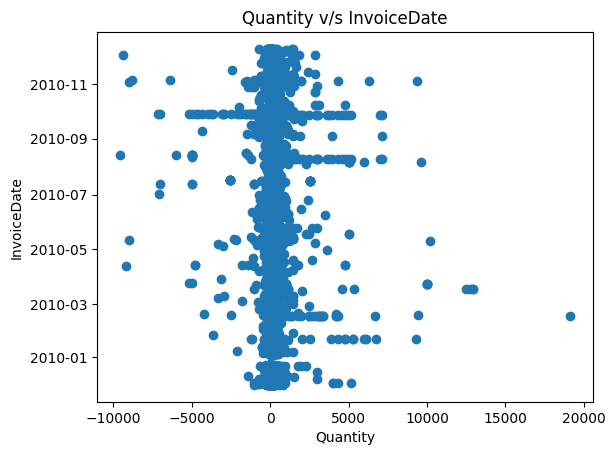

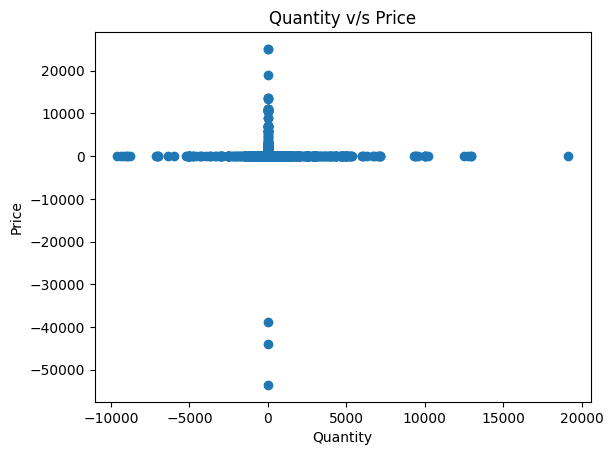

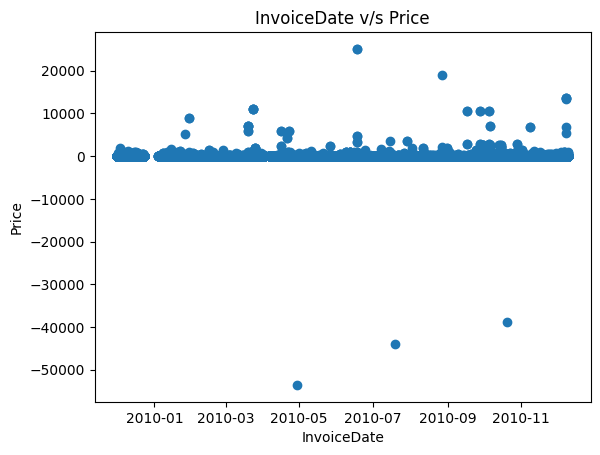

## Correlation:

## Missing Matrix:

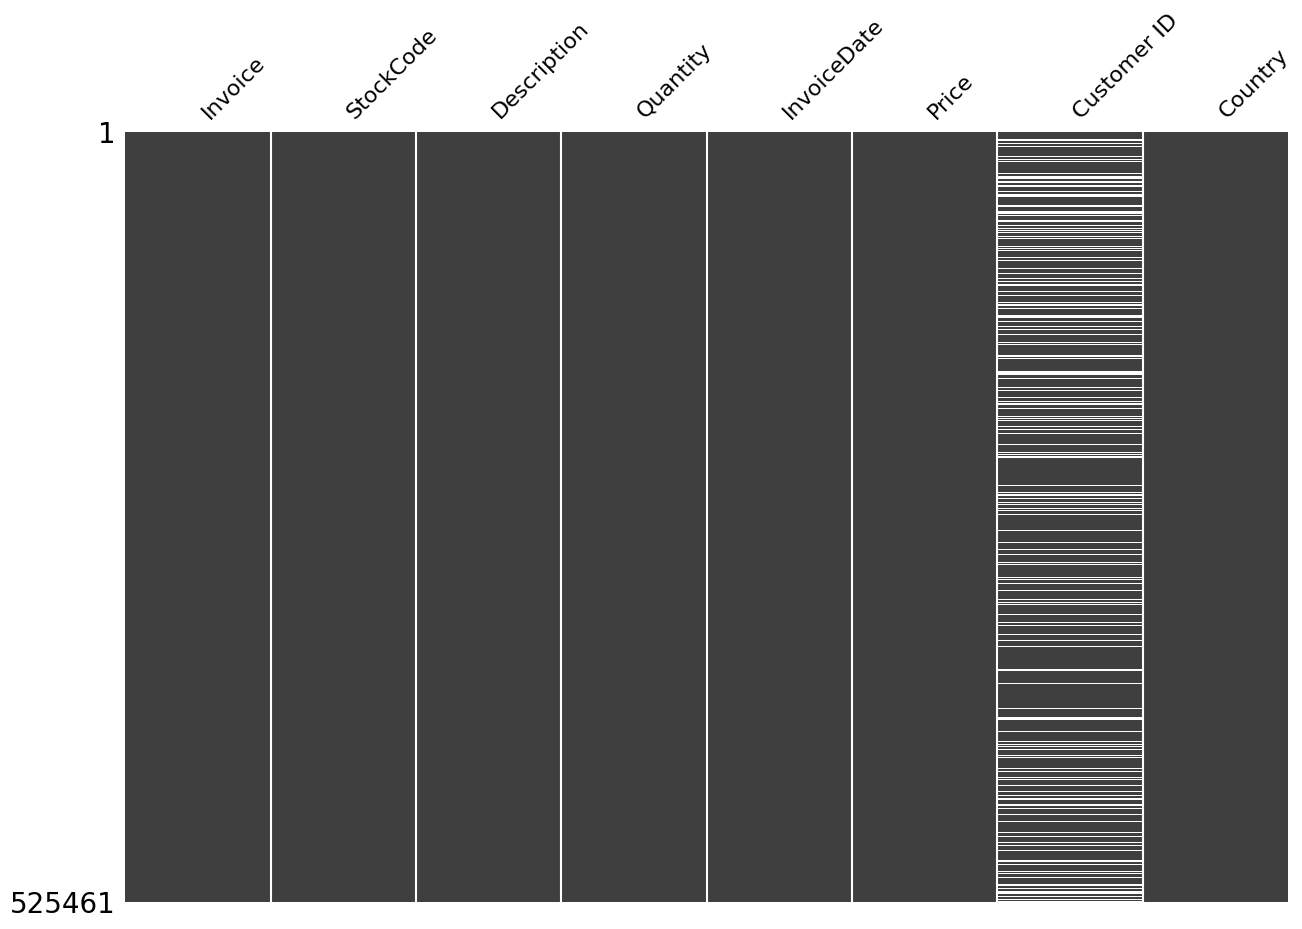

In [128]:
profile_df(df_retail)

En las figuras se puede observar:

- Anáisis bivariable entre Quantity e InvoiceDate: se observa que la mayoría de los datos se distribuyen alrededor de la cantidad 0 y que hay bastantes datos con cantidades negativas, lo cual, como se dijo antes, resulta muy extraño, ya que representan la cantidad de unidades del producto en la compra. Se observan también las cantidades *outliers*. Respecto a las fechas, se puede ver que se distribuyen de manera bastante uniforme con respecto a la cantidad, lo único que llama la atención es como se ve una distribución casi simétrica en las cantidades para ocubre del 2010.

- Análisis bivariable entre Quantity y Price: En este gráfico se observa una cruz que se forma centrada en el 0 de ambas variables. Llama la atención, igual que arriba, los precios negativos. La forma de cruz, se da debido a que se muestran todos los datos, por lo que los datos más lejanos fuerzan a que los límites del gráfico sean muy grandes, lo que da la impresión de que todos los datos son 0, cuando no es así, sólo se concentran en precios y cantidades bajas como es esperable.

- Análisis bivariable entre InvoiceDate y Price: En este caso se vuelven a observar los precios negativos, pero se ven en menor cantidad, lo que nos dice que esto ocurrió en fechas determinadas y no era algo usual, probablemente se trate de error humano. Por otra parte, se observan los precios mayores a 0 distribuidos de manera bastante uniforme a lo largo del tiempo y sólo algunos precios altos cada cierto tiempo, lo cual debe ser usual en ventas, ya que no es tan común que las personas inviertan mucho dinero en retail, a no ser que se compren electrodomésticos o muebles, que no suelen ser compras de todos los días.

- Matriz de correlación de Pearson: Se observa una matriz de correlación "perfecta", las variables se correlacionan un 100% consigo mismos y un 0% con las otras variables.

- En cuanto a la matriz de valores perdidos, se observa que los valores perdidos se concentran en la columna Costumer ID, lo cual tiene sentido, ya que no es necesario estar inscrito en una tienda como cliente, para comprar en ella, por lo que hay muchas compras que no se logran asociar a ningún cliente en particular.

### 1.2.3 Limpieza de Datos [1 pto]

Como pudo ver en las secciones anteriores, los datos presentan valores erroneos, es por esto que se le solicita que realice una función que permita limpiar el dataset. Realice esta función en base observaciones propias y considere como imposible tener cantidades negativas en las ventas.

Una vez realizada la función, realice nuevamente el análisis exploratorio y comente las principales diferencias.

**Respuesta:**

Se decide que para la limpieza se deben:
- Eliminar filas con valores negativos de Quantity
- Eliminar filas con valores negativos y 0 de Price
- Eliminar outliers identificados en la primera parte en las columnas Quantity y Price.

Se decide no hacer nada respecto a los valores perdidos de Costumer ID, ya que para los propósitos de esta entrega no resultarán molestos.

In [129]:
#Limpieza del dataset
def limpeza(dataframe_in, C1 = 'Quantity', C2 = 'Price'):
  dataframe = dataframe_in.copy()
  #Eliminar outliers de la columna conflictiva 1
  serie_C1 = dataframe[C1]
  outliers_C1 = serie_C1.loc[(np.abs(stats.zscore(serie_C1)) >= 3)].index
  dataframe.drop(outliers_C1,inplace=True)

  #Eliminar outliers de la columna conflictiva 2
  serie_C2 = dataframe[C2]
  outliers_C2 = serie_C2.loc[(np.abs(stats.zscore(serie_C2)) >= 3)].index
  dataframe.drop(outliers_C2,inplace=True)

  #Eliminar valores negativos de la columna conflictiva 1
  serie_C1 = dataframe[C1]
  neg_C1 = serie_C1.loc[serie_C1 < 0].index
  dataframe.drop(neg_C1,inplace=True)

  #Eliminar valores negativos de la columna conflictiva 1
  serie_C2 = dataframe[C2]
  neg_C2 = serie_C2.loc[serie_C2 <= 0].index
  dataframe.drop(neg_C2,inplace=True)

  return dataframe



In [130]:
df_retail_lim = limpeza(df_retail)
df_retail_lim

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [131]:
profile_serie(df_retail_lim['Price']) 

## Price Profile

Type                            float64
Number of observations         510388.0
Mean                           3.659062
Std                            8.062866
Min                               0.001
25%                                1.25
50%                                 2.1
75%                                4.21
Max                               441.1
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                         912.035036
Skew                          25.420646
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   509651
Duplicate rows (%)              99.86 %
Total size in memory      8166208 bytes
dtype: object

In [132]:
profile_serie(df_retail_lim['Quantity']) 

## Quantity Profile

Type                              int64
Number of observations         510388.0
Mean                           9.355769
Std                           21.148937
Min                                 1.0
25%                                 1.0
50%                                 3.0
75%                                10.0
Max                               330.0
Negative                              0
Negative (%)                      0.0 %
Zeros                                 0
Zeros (%)                         0.0 %
Kurt                          74.716508
Skew                           7.465831
                                       
Missing cells                         0
Missing cells (%)                 0.0 %
Duplicate rows                   510340
Duplicate rows (%)              99.99 %
Total size in memory      8166208 bytes
dtype: object

Se observa que para ambas series trabajadas ya no hay valores nulos y no se obtienen outliers demasiado alejados.

## Bivariant Analysis:

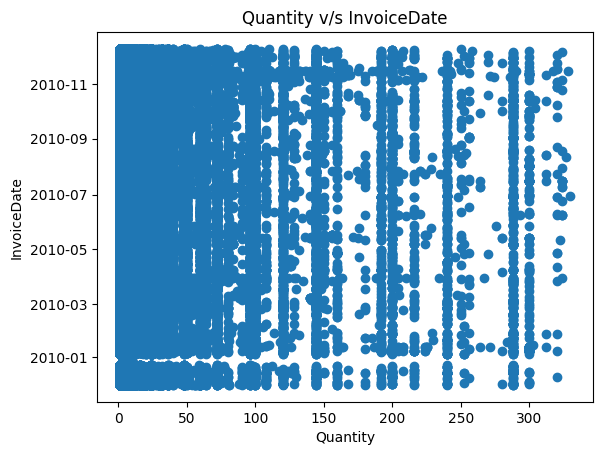

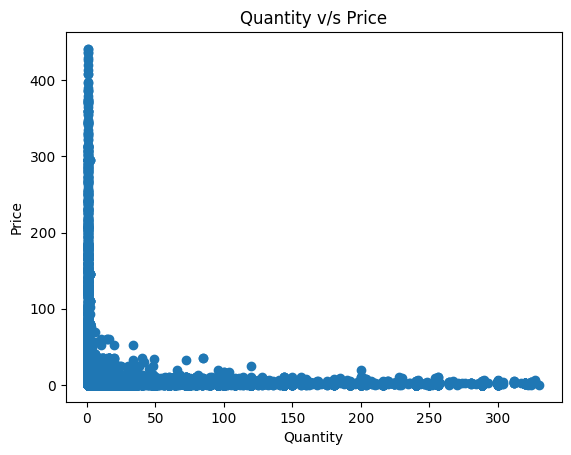

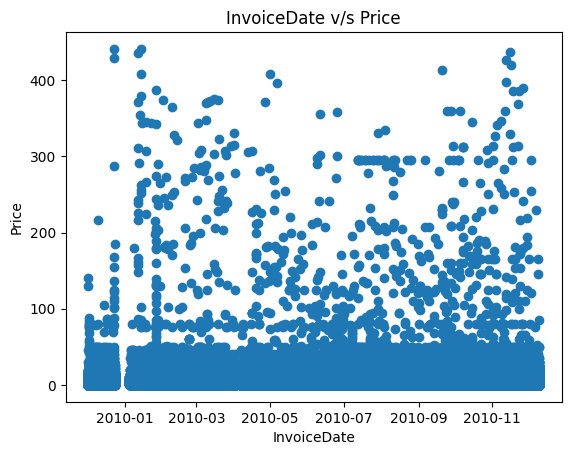

## Correlation:

## Missing Matrix:

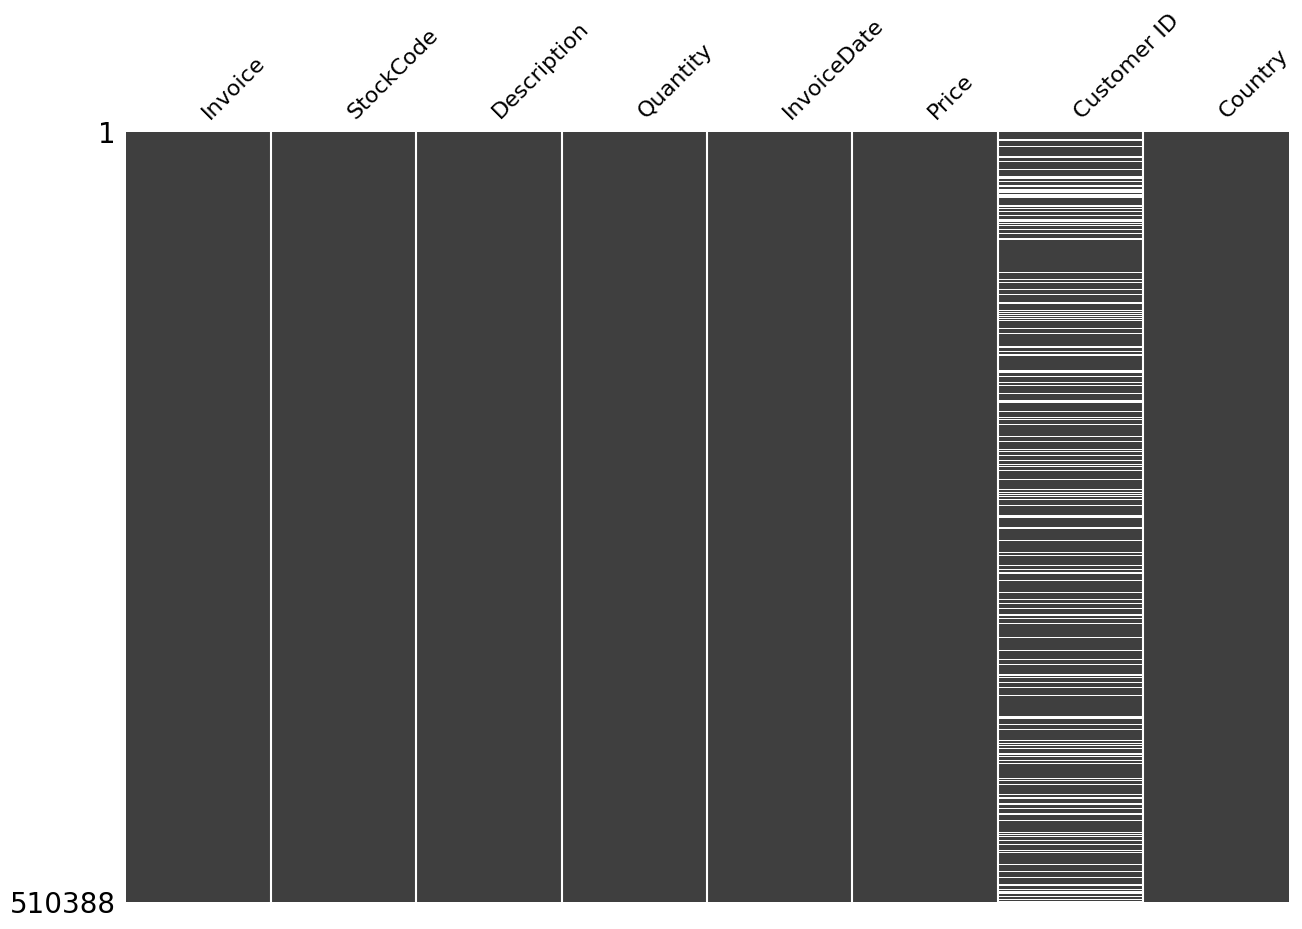

In [133]:
profile_df(df_retail_lim)

Gracias a que se eliminaron los outliers y valores negativos, ahora se puede observar de mejor manera los gráficos de dispersión bivariables. Podemos observar que:

- Entre InvoiceDate y Quantity no se logra descubrir ninguna distribución en particular, ya que es esperable que todos los días se compren distintas cantidades de producto sin ninguna preferencia en particular. También se aprecia que aproximadamente en enero hay una fecha que hubo ninguna o muy pocas ventas.

- Entre Price y Quantity se obtiene el mismo comportamiento anterior, pero se puede apreciar de manera más clara que los datos se concentran en poca cantidad de productos y de bajo precio, lo cual es esperable.

- Entre InvoiceDate y Price se observa una distribución uniforme muy concentrada en los precios bajos y menos concentrada a medida que sube el precio, lo cual es esperable. Al igual que en el primer gráfico, se logra apreciar una fecha sin ventas.

También se observan cambios en la matriz de correlación, si bien se mantiene la no correlación entre Quantity y Price, con los datos limpios se logra detectar correlación entre InvoiceDate con Quantity e InvoiceDate con Price, lo cual es más realista que lo que se tenía antes, ya que hay fechas donde se compra más. 

Por último, no se observan cambios en la matriz de valores perdidos, lo cual es consistente con que no se realizó una limpieza que tratara lo observado en ella.

### 1.2.4 Obtención de TOPs [0.75 ptos]

Sin considerar los comentarios realizados en la sección 1.2 , *Don Mora* les pide obtener el **Top de 30 productos que generan más ganancias** para la tienda de retail. Deben considerar todo el registro temporal presente en el dataset y entregar la información en un gráfico de barras de los ingresos/cantidades v/s el nombre de los productos (Utilice `plotly`). ¿Los artículos más vendidos son los mismos que generan más ganancias?, Comente los resultados obtenidos.

**Resultados:**

In [134]:
#Se debe definir la ganancia:
df_retail_lim['Gain'] = df_retail_lim['Price']*df_retail_lim['Quantity']
df_retail_lim

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Gain
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [143]:
top = df_retail_lim.groupby('Description')[['Gain', 'Quantity','Price']].sum().sort_values(by= 'Gain', ascending = False)[0:30]

In [144]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Ganancia', x=top.index, y=top['Gain']),
    go.Bar(name='Cantidad', x=top.index, y=top['Quantity']),
    go.Bar(name='Precio', x=top.index, y=top['Price'])
])
fig.update_layout(barmode='group', 
                  title='Top 30 productos que generan más ganancia con su precio y cantidad',
                  xaxis_title='Descripción producto')
fig.show()


Observando el gráfico se puede notar que no necesariamente los artículos más vendidos son los que generan más ganancias, ya que REGENCY CAKESTAND 3 TIER tiene una cantidad mucho menor que WHITE HANGING HEART T-LIGHT HOLDER, pero aún así genera una ganancia mayor. Esto se produce porque el valor de la ganancia también es dependiente del precio, el cual afecta bastante como se puede observar  en el caso de DOTCOM POSTAGE.

### 1.2.5 Visualización del registro temporal [0,75 ptos]

El dueño del retail en su afán por saber más sobre los datos de su firma les solicita que grafiquen las ventas respecto al tiempo. Con esto les aclara que durante el día tienen muchas variaciones en sus ventas, por lo que les recomienda que consideren el registro temporal como `año-mes-día`. ¿Es posible observar datos extraños?, Comente lo que observa del gráfico.

In [162]:
def plot_ventas(dataframe_in):
  df = dataframe_in.copy()
  df['Date'] = df['InvoiceDate'].dt.floor('D').dt.strftime('%Y/%m/%d')
  #Se borran boletas duplicadas porque son la misma venta
  df.drop_duplicates(subset=['Invoice'],inplace=True)
  df_grup = df.groupby('Date')['Invoice'].count().reset_index(name='cantidad')
  #Se grafica
  fig = go.Figure(data=go.Scatter(x=df_grup['Date'], y=df_grup['cantidad'], mode='lines'))
  fig.update_layout(title='Ventas respecto al tiempo',
                    xaxis_title='Fecha',
                    yaxis_title='Ventas'
                    )
  fig.show()
  return

In [163]:
plot_ventas(df_retail_lim)

No se observa nada demasiado extravagante en los datos, sólo cabe mencionar que la gran variabilidad en ventas por día que menciona el dueño es real, lo cual ocasiona un gráfico con muchos picos y donde se ve que las cantidades de ventas no siguen ninguna tendencia en particular.

Además se puede observar que el día con menos ventas fue el 6 de enero donde hubieron 13 y el con más ventas fue el 25 de noviembre con 152 ventas.

# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://i.pinimg.com/originals/65/ae/27/65ae270df87c3c4adcea997e48f60852.gif "bruno")


<br>
<center>
<img src="https://i.kym-cdn.com/photos/images/original/001/194/195/b18.png" width=100 height=50 />
</center>
<br>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>